<a href="https://colab.research.google.com/github/AnujM09/Seoul-Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

In [1]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


# <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# **Data Preparation**

In [2]:
# Importing all required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing File from drive
df=pd.read_csv('/content/drive/MyDrive/Capstone_Project_For_Data_Science/Bike_Sharing_Demand_Prediction/CSV/SeoulBikeData.csv',encoding='latin')

In [4]:
# Checking top 5 Rows of data
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
# Shape of dataframe
df.shape

(8760, 14)

In [6]:
# Null values if any
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [7]:
# Duplicate values if any
df.duplicated().sum()

0

In [8]:
# short summary of dataframe
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,8760,365,01/12/2017,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rented Bike Count,8760.0,NaN,NaN,NaN,704.602055,644.997468,0.0,191.0,504.5,1065.25,3556.0
Hour,8760.0,NaN,NaN,NaN,11.5,6.922582,0.0,5.75,11.5,17.25,23.0
Temperature(°C),8760.0,NaN,NaN,NaN,12.882922,11.944825,-17.8,3.5,13.7,22.5,39.4
Humidity(%),8760.0,NaN,NaN,NaN,58.226256,20.362413,0.0,42.0,57.0,74.0,98.0
Wind speed (m/s),8760.0,NaN,NaN,NaN,1.724909,1.0363,0.0,0.9,1.5,2.3,7.4
Visibility (10m),8760.0,NaN,NaN,NaN,1436.825799,608.298712,27.0,940.0,1698.0,2000.0,2000.0
Dew point temperature(°C),8760.0,NaN,NaN,NaN,4.073813,13.060369,-30.6,-4.7,5.1,14.8,27.2
Solar Radiation (MJ/m2),8760.0,NaN,NaN,NaN,0.569111,0.868746,0.0,0.0,0.01,0.93,3.52
Rainfall(mm),8760.0,NaN,NaN,NaN,0.148687,1.128193,0.0,0.0,0.0,0.0,35.0


# **Data Preproccessing**

In [9]:
# Extracting Weekends
df['Date']=pd.to_datetime(df['Date'])
df['day']=df['Date'].dt.day_name()

In [10]:
df['day'].unique()

array(['Thursday', 'Sunday', 'Wednesday', 'Friday', 'Monday', 'Saturday',
       'Tuesday'], dtype=object)

In [11]:
df['weekend']=df['day'].apply(lambda x: 1 if x=='Sunday' or x=='Saturday' else 0)

In [12]:
df['Month']=df['Date'].dt.month_name()
df['year']=df['Date'].dt.year

# **Expoatory Data Analysis**

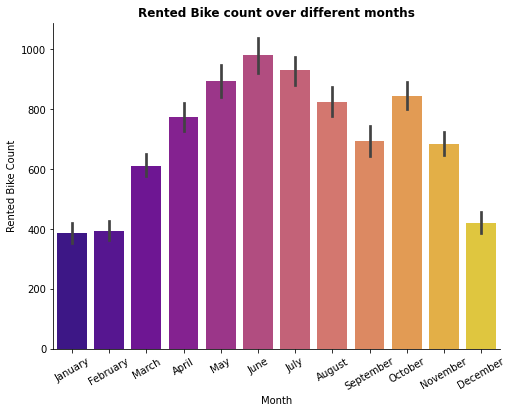

In [13]:
# Bike Count Over Months
plt.figure(figsize=(8,6))
plt.title('Rented Bike count over different months', fontweight = 'bold')
sns.barplot(data = df, x='Month', y = 'Rented Bike Count', palette ='plasma')
sns.despine()
plt.xticks(rotation='30')
plt.show()

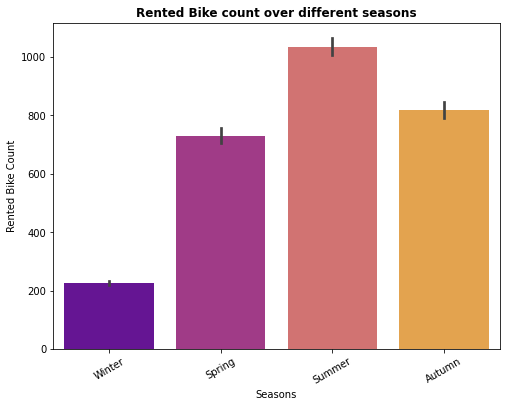

In [14]:
# Bike Count Over Seasons
plt.figure(figsize=(8,6))
plt.title('Rented Bike count over different seasons',fontweight = 'bold')
sns.barplot(data = df, x='Seasons', y = 'Rented Bike Count', palette ='plasma')
plt.xticks(rotation='30')
plt.show()

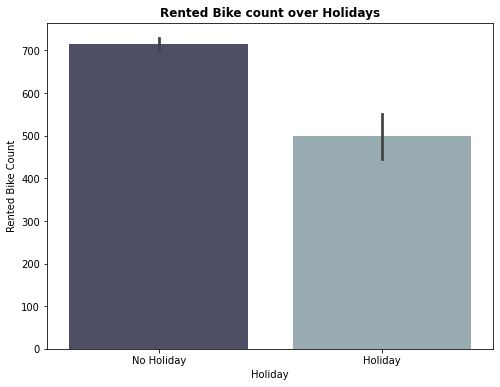

In [15]:
# Bike Count Over Holidays
plt.figure(figsize=(8,6))
plt.title('Rented Bike count over Holidays',fontweight = 'bold')
sns.barplot(data = df, x='Holiday', y = 'Rented Bike Count', palette ='bone')
plt.show()

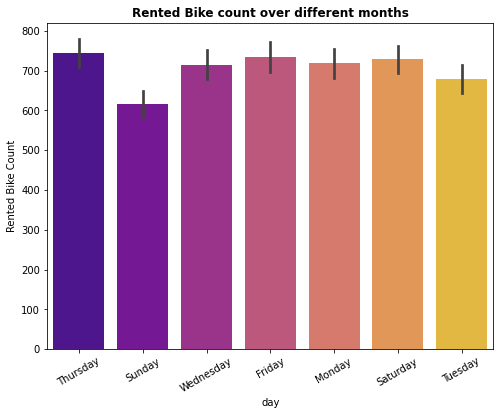

In [16]:
# Bike Count Over Months
plt.figure(figsize=(8,6))
plt.title('Rented Bike count over different months',fontweight = 'bold')
sns.barplot(data = df, x='day', y = 'Rented Bike Count', palette ='plasma')
plt.xticks(rotation='30')
plt.show()

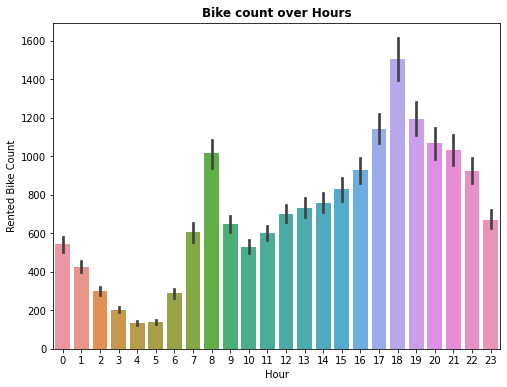

In [17]:
plt.figure(figsize=(8,6))
plt.title('Bike count over Hours',fontweight = 'bold')
sns.barplot(data=df, x='Hour', y = 'Rented Bike Count')
plt.show()

In [18]:
# Dropping Unwated columns
df1 = df.drop(['Date','day','Month','year'], axis=1)

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  weekend                    8760 non-null   int64

In [20]:
# Now check all numerical columns with the help of distplot
numeric_feature=df1.select_dtypes(include=['int64','float64']).columns
numeric_feature

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'weekend'],
      dtype='object')

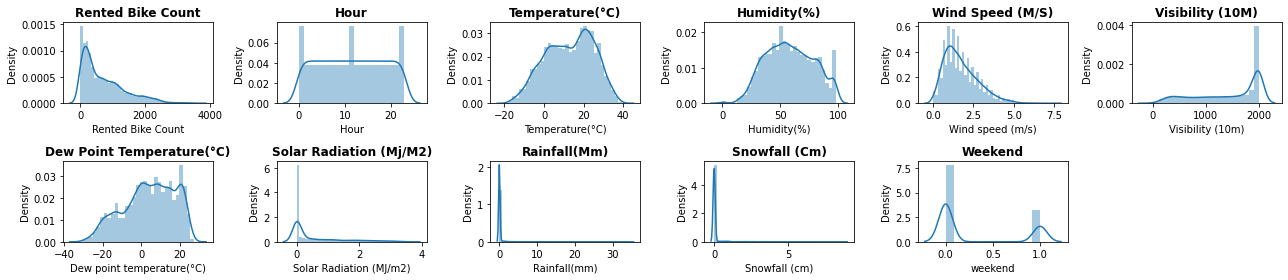

In [21]:
# Visualizing the distributions
plt.figure(figsize=(18,4))
for n,column in enumerate(df1.describe().columns):
  plt.subplot(2,6,n+1)
  sns.distplot(df1[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

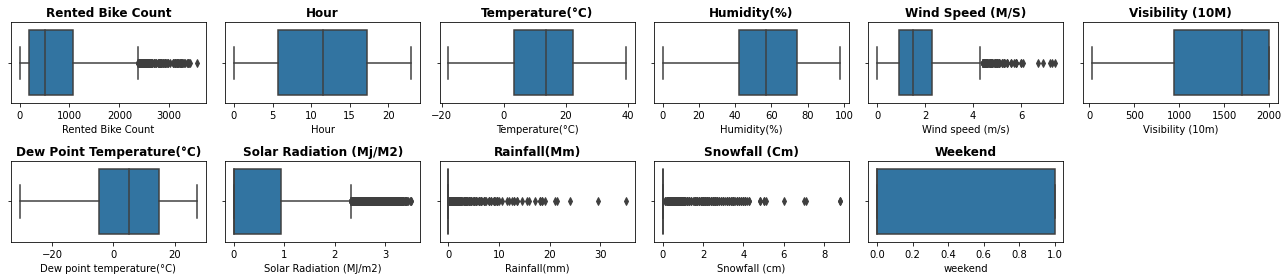

In [22]:
# Checking for outliers
plt.figure(figsize=(18,4))
for n,column in enumerate(df1.describe().columns):
  plt.subplot(2, 6, n+1)
  sns.boxplot(df1[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

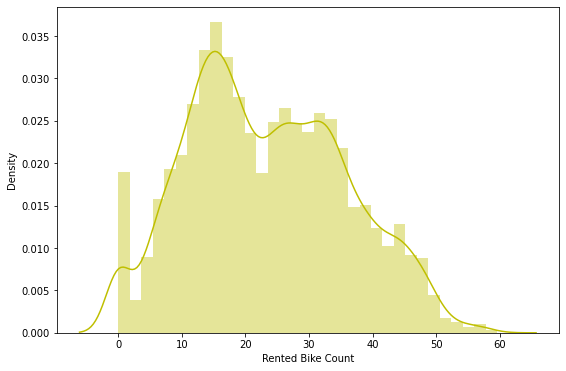

In [23]:
# from above two graphs we can see that there are so many outliers are present so we have to apply transformation
plt.figure(figsize=(9, 6))
sns.distplot(np.sqrt(df['Rented Bike Count']), color='y')
plt.show()

In [24]:
np.sqrt(df['Rented Bike Count']).skew()

0.237362090985412

In [25]:
# Now we will check correlarion between output columns and individual columns

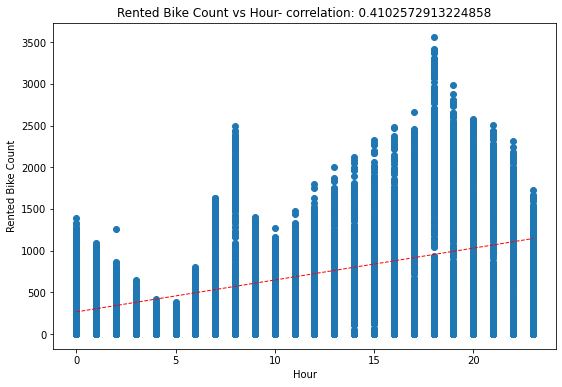

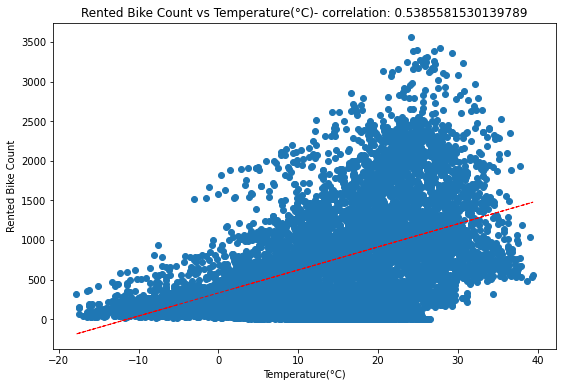

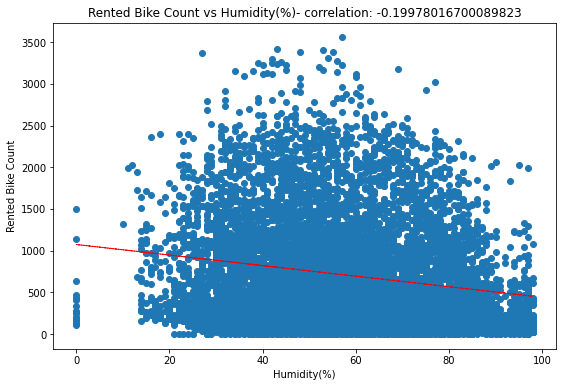

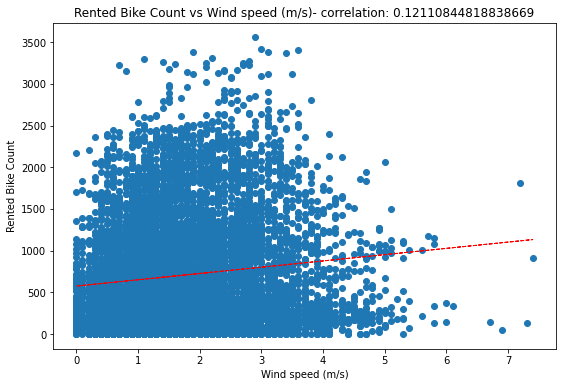

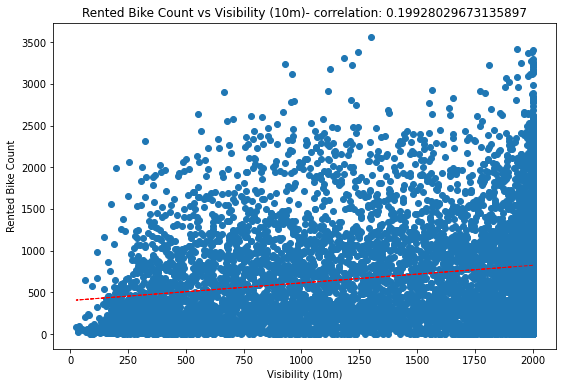

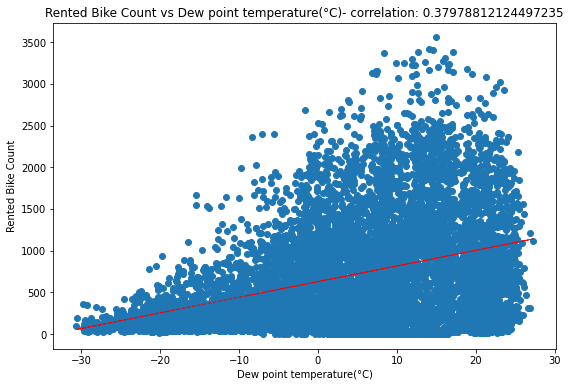

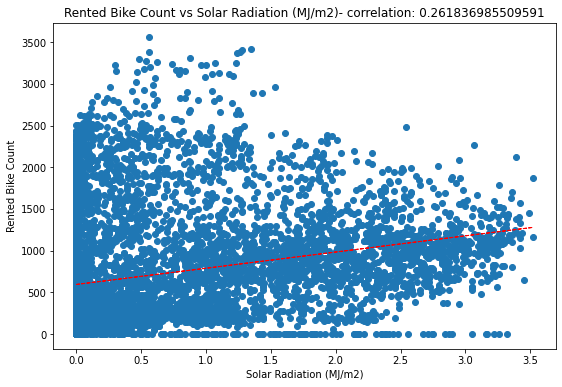

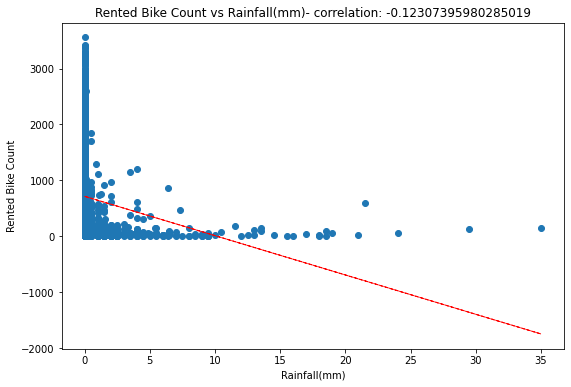

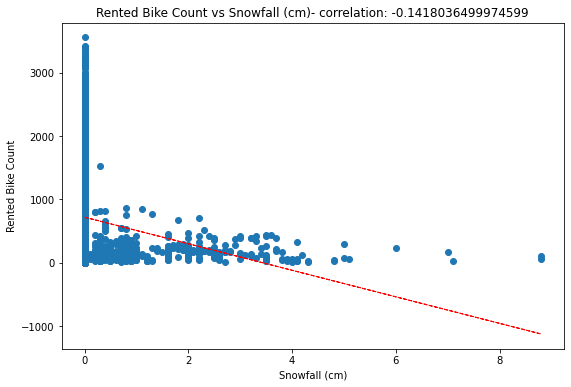

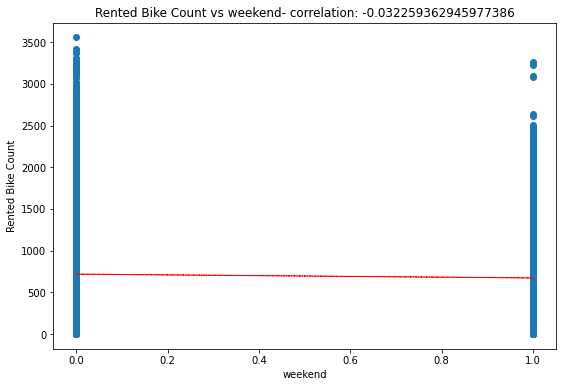

In [26]:
for col in numeric_feature[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['Rented Bike Count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Rented Bike Count')
    ax.set_title('Rented Bike Count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['Rented Bike Count'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

In [27]:
# samething we can see from here also
df.corr()['Rented Bike Count']

Rented Bike Count            1.000000
Hour                         0.410257
Temperature(°C)              0.538558
Humidity(%)                 -0.199780
Wind speed (m/s)             0.121108
Visibility (10m)             0.199280
Dew point temperature(°C)    0.379788
Solar Radiation (MJ/m2)      0.261837
Rainfall(mm)                -0.123074
Snowfall (cm)               -0.141804
weekend                     -0.032259
year                         0.215162
Name: Rented Bike Count, dtype: float64

# **Correlation Heatmap**

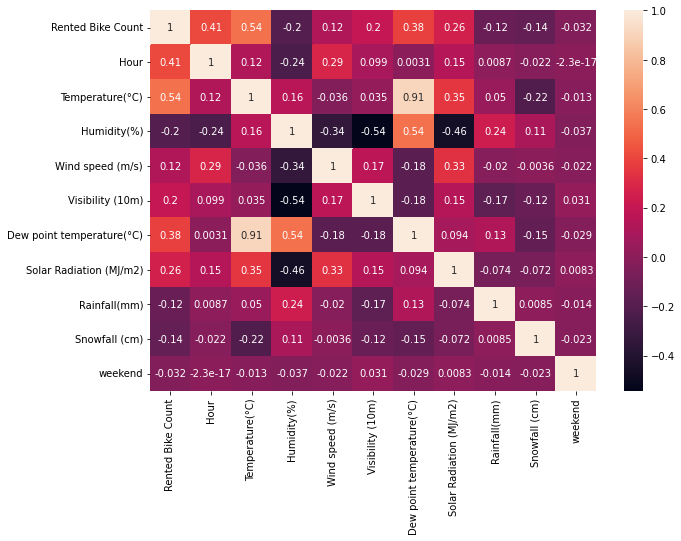

In [28]:
# Now check corelation between independent columns
plt.figure(figsize=(10,7))
sns.heatmap(df1.corr(), annot=True)
plt.show()

In [29]:
# From above heatmap we can see that Temperature and Dew Point Temperature are highly correlated
# So we have to drop any one to avoid multicolinearity

df2 = df1.drop(['Temperature(°C)'],axis=1)

In [30]:
# Now for Categorical data
# OneHot Encoding

df3 = pd.get_dummies(df1, columns=['Seasons','Holiday','Functioning Day'], drop_first = True)

In [31]:
df3.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),weekend,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,0,1,1,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,0,1,1,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,0,1,1,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,0,1,1,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,0,1,1,1


In [32]:
# Now extracting x and y values for train and test split

X = df3.iloc[:,1:].values

y = df3.iloc[:,0].values

In [33]:
X

array([[ 0. , -5.2, 37. , ...,  1. ,  1. ,  1. ],
       [ 1. , -5.5, 38. , ...,  1. ,  1. ,  1. ],
       [ 2. , -6. , 39. , ...,  1. ,  1. ,  1. ],
       ...,
       [21. ,  2.6, 39. , ...,  0. ,  1. ,  1. ],
       [22. ,  2.1, 41. , ...,  0. ,  1. ,  1. ],
       [23. ,  1.9, 43. , ...,  0. ,  1. ,  1. ]])

In [34]:
y

array([254, 204, 173, ..., 694, 712, 584])

In [35]:
# Now convert y into sqrt of y

In [36]:
y = np.sqrt(y)
y

array([15.93737745, 14.28285686, 13.15294644, ..., 26.34387974,
       26.68332813, 24.16609195])

In [37]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [38]:
print(f"Shape of X Train: {x_train.shape}")
print(f"Shape of X Test: {x_test.shape}")
print(f"Shape of y Train: {y_train.shape}")
print(f"Shape of y Test: {y_test.shape}")

Shape of X Train: (7008, 15)
Shape of X Test: (1752, 15)
Shape of y Train: (7008,)
Shape of y Test: (1752,)


In [39]:
# Standard Scaling
scaler = StandardScaler()

In [40]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [41]:
# Setting up Linear Regression
lr = LinearRegression()
lr.fit(x_train_scaled, y_train)

lr.score(x_test_scaled, y_test)

0.6449362165360564

In [42]:
# Linear Regression Coefficients
lr.coef_

array([ 3.40731422,  0.88592152, -5.49699381,  0.13664149,  0.02961474,
        5.60493979, -0.605101  , -1.68762318,  0.11444609, -0.3011181 ,
       -1.26151333, -1.22258193, -3.48328742,  0.69749472,  5.2005646 ])

In [43]:
# Linear regression Intercept
lr.intercept_

23.48839516706495

# **Model Building**

In [44]:
models = [LinearRegression(), DecisionTreeRegressor(), KNeighborsRegressor(), XGBRegressor(), RandomForestRegressor()]

In [45]:
for model in models:
  regressor = model.fit(x_train_scaled, y_train)
  y_pred = regressor.predict(x_test_scaled)
  accuracy = regressor.score(x_test_scaled, y_test)
  cross_val = cross_val_score(regressor, x_train_scaled, y_train)
  mean_cross_val = np.mean(cross_val)
  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  r_square = r2_score(y_test, y_pred)
  rmse = np.sqrt(mse)

  print(f'Model :{model}')
  print(f'Accuracy :{accuracy}')
  print(f'Cross Val score: {mean_cross_val}')
  print(f'Mean Absolute Error: {mae}')
  print(f'Mean Squared Error: {mse}')
  print(f'R Square: {r_square}')
  print(f'RMSE : {rmse}')

  print('\n')
  print('*'*40)
  print('\n')

Model :LinearRegression()
Accuracy :0.6449362165360564
Cross Val score: 0.6545912014959023
Mean Absolute Error: 5.622645255804521
Mean Squared Error: 54.080584119825645
R Square: 0.6449362165360564
RMSE : 7.3539502391453295


****************************************


Model :DecisionTreeRegressor()
Accuracy :0.8268368813739385
Cross Val score: 0.8309331866789375
Mean Absolute Error: 3.2864801244561352
Mean Squared Error: 26.37487414781363
R Square: 0.8268368813739385
RMSE : 5.135647393251763


****************************************


Model :KNeighborsRegressor()
Accuracy :0.8291109820157133
Cross Val score: 0.8112282104654366
Mean Absolute Error: 3.5520844170080736
Mean Squared Error: 26.028500631893106
R Square: 0.8291109820157133
RMSE : 5.101813465023305


****************************************


[18:47:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:47:59] WARNING: /workspace/src/objective/regression_obj

## **From above Table we can see that Random Forest Regressor is giving Maximum Accuracy**

# **Random Forest Regressor**

Accuracy :0.9089257000457267
Cross Val score: 0.9108700174089579
Mean Absolute Error: 2.4745128733762445
Mean Squared Error: 13.871736767350342
R Square: 0.9089257000457267
RMSE: 3.7244780530096215


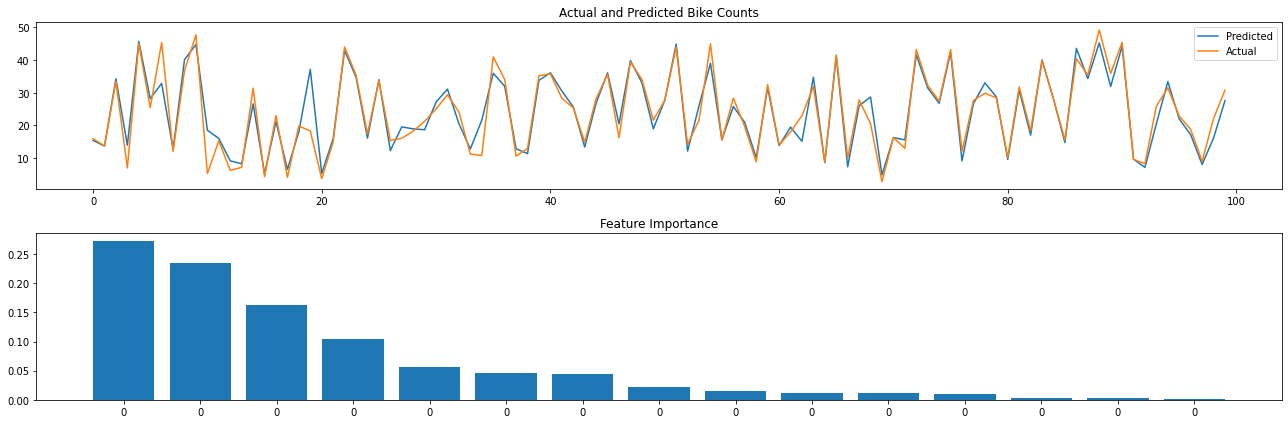

In [46]:
rfr = RandomForestRegressor(criterion='squared_error')

rfr.fit(x_train_scaled, y_train)

y_pred = rfr.predict(x_test_scaled)
accuracy = rfr.score(x_test_scaled, y_test)
cross_val = cross_val_score(rfr, x_train_scaled, y_train)
mean_cross_val = np.mean(cross_val)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r_square = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Accuracy :{accuracy}')
print(f'Cross Val score: {mean_cross_val}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R Square: {r_square}')
print(f'RMSE: {rmse}')

imp = np.abs(rfr.feature_importances_)

indices = np.argsort(imp)
indices = indices[::-1]

plt.figure(figsize=(18,6))
plt.subplot(2,1,1)
plt.plot((y_pred)[:100])
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.title('Actual and Predicted Bike Counts')
plt.subplot(2,1,2)
plt.bar(range(len(indices)),imp[indices])
plt.xticks(range(len(indices)), [feature[i] for i in indices])
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

# **Conclusion**

*   As it was stated in the problem statement, the business just started out in 2017.So the number of bikes rented in 2017 was too small.

*    We can see in the year 2018 the rented bike count was 5986984 which is greater than in 2017.

*   We can say on no holiday the rented bike count is much higher than on holiday.

*   An ironic insight, all the holidays fall on functioning Days.
*    We can say on no holiday the rented bike count is much higher than on holiday.


*   The number of business hours of the day and the demand for rented bikes were most correlated. It's common sense too.

*   Highest number of bikes rented at the 18th hour of the day.


*   After trying combinations of features with linear regression the model under fitted. It seemed obvious because data is spread too much. It didn't seem practical to fit a line.
   

*   Hour, temperature, and solar radiation were the most important features for predicting the count of bikes required.

*   Rainfall and snowfall impact the number of bikes rented tremendously with a very high downfall.

*   Random forest regressor performs really well when compared to linear regression with high model performance and low rmse.

*   There's is a whooping increase in the number of bike rents in the year 2018. In the last month, the demand decreases in 2018 but increases in it were seen to be increasing at the end of 2017. It is like this because in 2017 the demand is taking off and we can see the pattern as it is still increasing in the beginning months of 2018. There is a decline at the end of the year. This could be a repercussion of the winter season as well.

*   The rise in demand started at the end of 2017 too in the winter season of the year. The observer may find it weird because demand decreased at the end of 2018. Actually, for this situation, it can be said that, as the business grew to April 2018 it increased exponentially as compared to 2017. So, we can say that in the winter of 2017 demand increased but it wasn't still up to the mark of its full potential. With simple heuristics for the future as well if everything else in independent variables remains constant we can say that the demand will decrease in December but proportionate to the overall demand of that year.





